Demo of https://github.com/hgbrian/pdb2png

Input a PDB id, and generate a PNG of that protein.

colab by [@btnaughton](https://twitter.com/btnaughton)

Leave PDB_id blank for a demo PDB file.

Installing pymol without conda takes ~5m, but this is a colab-specific issue.
For normal use, just install `mamba install -c conda-forge pymol-open-source`.

In [ ]:
#@title pdb2png

PDB_id = '' #@param {type:"string"}

In [ ]:
!git clone https://github.com/hgbrian/pdb2png

install pymol without conda

In [ ]:
!git clone https://github.com/schrodinger/pymol-open-source.git
!git clone https://github.com/rcsb/mmtf-cpp.git
!mv mmtf-cpp/include/mmtf* pymol-open-source/include/
%cd /content/pymol-open-source
!apt-get update
!apt-get install libglew-dev
!apt-get install libglm-dev
!python setup.py -q install

In [ ]:
import os
import requests
import time
from random import random

def download_pdb_file(pdb_id: str) -> str:
    """Download pdb file as a string from rcsb.org"""
    PDB_DIR ="."
    os.makedirs(PDB_DIR, exist_ok=True)

    # url or pdb_id
    if pdb_id.startswith('http'):
        url = pdb_id
        filename = url.split('/')[-1]
    elif pdb_id.endswith(".pdb"):
        return pdb_id
    else:
        if pdb_id.startswith("AF"):
            url = f"https://alphafold.ebi.ac.uk/files/{pdb_id}-model_v3.pdb"
        else:
            url = f"http://files.rcsb.org/view/{pdb_id}.pdb"
        filename = f'{pdb_id}.pdb'

    cache_path = os.path.join(PDB_DIR, filename)
    if os.path.exists(cache_path):
        return cache_path

    pdb_req = requests.get(url)
    pdb_req.raise_for_status()
    open(cache_path, 'w').write(pdb_req.text)
    return cache_path

In [ ]:
import pdb2png
%cd /content/pdb2png
!python pdb2png.py -h

/content/pdb2png
usage: pdb2png.py
       [-h]
       [--protein_rotate PROTEIN_ROTATE]
       [--protein_color PROTEIN_COLOR]
       [--protein_zoom PROTEIN_ZOOM]
       [--hetatm_color HETATM_COLOR]
       [--ligand_id LIGAND_ID]
       [--ligand_chain LIGAND_CHAIN]
       [--ligand_zoom LIGAND_ZOOM]
       [--ligand_color LIGAND_COLOR]
       [--show_water]
       [--render_style RENDER_STYLE]
       [--width WIDTH]
       [--height HEIGHT]
       pdb_file

Visualize a
PDB file.

positional arguments:
  pdb_file
    Path to the
    PDB file to
    visualize.

options:
  -h, --help
    show this
    help
    message and
    exit
  --protein_rotate PROTEIN_ROTATE
    protein
    rotation in
    degrees,
    comma-
    delimited
  --protein_color PROTEIN_COLOR
    protein
    color
    (e.g., red
    or 250,50,5
    0,50,50,200
    )
  --protein_zoom PROTEIN_ZOOM
    protein
    zoom (e.g.,
    -40 (zoomed
    in) to 100
    (zoomed
    out)
  --hetatm_color HETATM_COLOR
    hetatm
   

In [ ]:
%cd /content/pdb2png

if PDB_id == '':
  PDB_id = "7S15"

pdb_file = download_pdb_file(PDB_id)
!python pdb2png.py {pdb_file}

/content/pdb2png


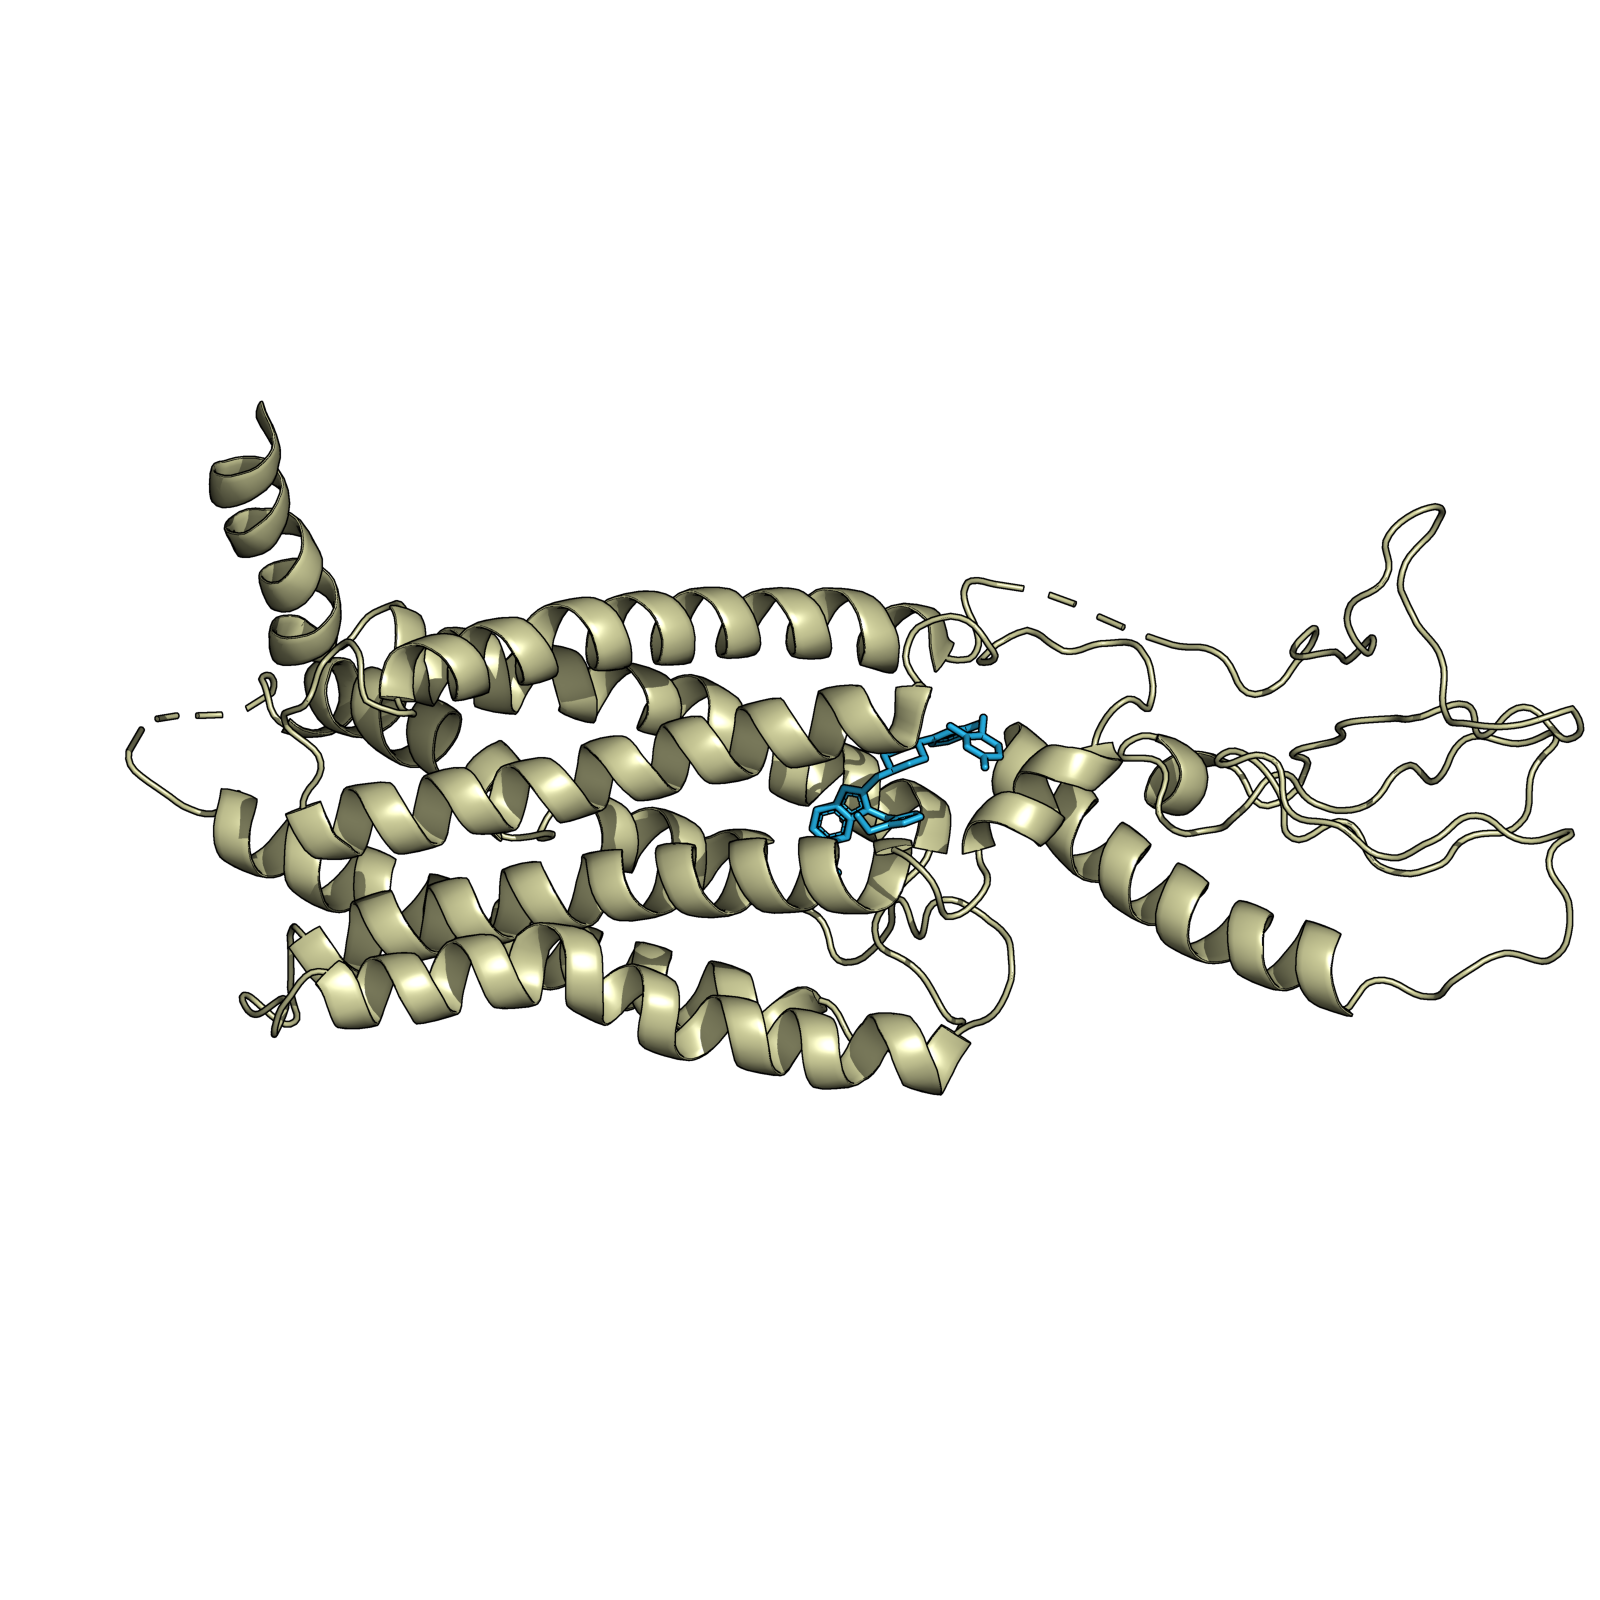

In [ ]:
from IPython.display import Image
Image(f"{PDB_id}.png")